# LSST AGN Data Challenge 2021

__By:__ Gordon Richards

This notebook shows an example of how to read in and evaluate a simulated `Object` Table from the 2021 AGN Data Challenge.  

We use data from Stripe 82 where there are time domain data to populate the variable summary statistics in the Object table.   See [LC features](https://github.com/RichardsGroup/AGN_DataChallenge/blob/main/docs/04_LC_features.ipynb) for a description of how those variability summary statistics were derived.

See [here](https://github.com/RichardsGroup/AGN_DataChallenge/blob/main/docs/) for a description of how the `Object` (also the `Source` and `ForcedSource`) tables were constructed.

See [the main github repo](https://github.com/RichardsGroup/AGN_DataChallenge) for instructions on how to get started with the 2021 AGN Data Challenge data using Sciserver.org.

### Load software

In [1]:
## commonly used modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys
import yaml

pd.set_option('display.max_columns', 999)

### Set data directory to point to the 2021 AGN Data Challenge data

In [2]:
data_dir = "/home/idies/workspace/Temporary/ywx649999311/LSST_AGN/Class_Training/DC/"

### Read the 'Object' table

See [here](https://en.wikipedia.org/wiki/Apache_Parquet) for an explanation of the Parquet data format, but it can easily be read into a Pandas DataFrame.

In [25]:
object_df = pd.read_parquet(os.path.join(data_dir, 's82ObjectTable.parquet'))
object_df.head(3)

,ra,dec,psPm_ra,psPm_dec,psParallax,psFlux_u,psFlux_g,psFlux_r,psFlux_i,psFlux_z,psFlux_y,psFluxErr_u,psFluxErr_g,psFluxErr_r,psFluxErr_i,psFluxErr_z,psFluxErr_y,bdFlux_u,bdFlux_g,bdFlux_r,bdFlux_i,bdFlux_z,bdFlux_y,bdFluxErr_u,bdFluxErr_g,bdFluxErr_r,bdFluxErr_i,bdFluxErr_z,bdFluxErr_y,psMag_u,psMag_g,psMag_r,psMag_i,psMag_z,psMag_y,psMagErr_u,psMagErr_g,psMagErr_r,psMagErr_i,psMagErr_z,psMagErr_y,bdMag_u,bdMag_g,bdMag_r,bdMag_i,bdMag_z,bdMag_y,bdMagErr_u,bdMagErr_g,bdMagErr_r,bdMagErr_i,bdMagErr_z,bdMagErr_y,extendedness_u,extendedness_g,extendedness_r,extendedness_i,extendedness_z,extendedness_y,stdColor_0,stdColor_1,stdColor_2,stdColor_3,stdColor_4,stdColorErr_0,stdColorErr_1,stdColorErr_2,stdColorErr_3,stdColorErr_4,class,photoZ_pest,z,flags_u,flags_g,flags_r,flags_i,flags_z,flags_y,lcPeriodic[0]_g,lcPeriodic[0]_r,lcPeriodic[0]_i,lcPeriodic[1]_g,lcPeriodic[1]_r,lcPeriodic[1]_i,lcPeriodic[2]_g,lcPeriodic[2]_r,lcPeriodic[2]_i,lcPeriodic[3]_g,lcPeriodic[3]_r,lcPeriodic[3]_i,lcPeriodic[4]_u,lcPeriodic[4]_g,lcPeriodic[4]_r,lcPeriodic[4]_i,lcPeriodic[4]_z,lcPeriodic[5]_u,lcPeriodic[5]_g,lcPeriodic[5]_r,lcPeriodic[5]_i,lcPeriodic[5]_z,lcPeriodic[6]_u,lcPeriodic[6]_g,lcPeriodic[6]_r,lcPeriodic[6]_i,lcPeriodic[6]_z,lcPeriodic[7]_u,lcPeriodic[7]_g,lcPeriodic[7]_r,lcPeriodic[7]_i,lcPeriodic[7]_z,lcPeriodic[8]_u,lcPeriodic[8]_g,lcPeriodic[8]_r,lcPeriodic[8]_i,lcPeriodic[8]_z,lcPeriodic[9]_u,lcPeriodic[9]_g,lcPeriodic[9]_r,lcPeriodic[9]_i,lcPeriodic[9]_z,lcPeriodic[10]_u,lcPeriodic[10]_g,lcPeriodic[10]_r,lcPeriodic[10]_i,lcPeriodic[10]_z,lcPeriodic[11]_u,lcPeriodic[11]_g,lcPeriodic[11]_r,lcPeriodic[11]_i,lcPeriodic[11]_z,lcPeriodic[12]_u,lcPeriodic[12]_g,lcPeriodic[12]_r,lcPeriodic[12]_i,lcPeriodic[12]_z,lcPeriodic[13]_u,lcPeriodic[13]_g,lcPeriodic[13]_r,lcPeriodic[13]_i,lcPeriodic[13]_z,lcPeriodic[14]_u,lcPeriodic[14]_g,lcPeriodic[14]_r,lcPeriodic[14]_i,lcPeriodic[14]_z,lcPeriodic[15]_u,lcPeriodic[15]_g,lcPeriodic[15]_r,lcPeriodic[15]_i,lcPeriodic[15]_z,lcPeriodic[16]_u,lcPeriodic[16]_g,lcPeriodic[16]_r,lcPeriodic[16]_i,lcPeriodic[16]_z,lcPeriodic[17]_u,lcPeriodic[17]_g,lcPeriodic[17]_r,lcPeriodic[17]_i,lcPeriodic[17]_z,lcPeriodic[18]_u,lcPeriodic[18]_g,lcPeriodic[18]_r,lcPeriodic[18]_i,lcPeriodic[18]_z,lcPeriodic[19]_u,lcPeriodic[19]_g,lcPeriodic[19]_r,lcPeriodic[19]_i,lcPeriodic[19]_z,lcPeriodic[20]_u,lcPeriodic[20]_g,lcPeriodic[20]_r,lcPeriodic[20]_i,lcPeriodic[20]_z,lcPeriodic[21]_u,lcPeriodic[21]_g,lcPeriodic[21]_r,lcPeriodic[21]_i,lcPeriodic[21]_z,lcPeriodic[22]_u,lcPeriodic[22]_g,lcPeriodic[22]_r,lcPeriodic[22]_i,lcPeriodic[22]_z,lcPeriodic[23]_u,lcPeriodic[23]_g,lcPeriodic[23]_r,lcPeriodic[23]_i,lcPeriodic[23]_z,lcPeriodic[24]_u,lcPeriodic[24]_g,lcPeriodic[24]_r,lcPeriodic[24]_i,lcPeriodic[24]_z,lcPeriodic[25]_u,lcPeriodic[25]_g,lcPeriodic[25]_r,lcPeriodic[25]_i,lcPeriodic[25]_z,lcPeriodic[26]_u,lcPeriodic[26]_g,lcPeriodic[26]_r,lcPeriodic[26]_i,lcPeriodic[26]_z,lcPeriodic[27]_u,lcPeriodic[27]_g,lcPeriodic[27]_r,lcPeriodic[27]_i,lcPeriodic[27]_z,lcPeriodic[28]_u,lcPeriodic[28]_g,lcPeriodic[28]_r,lcPeriodic[28]_i,lcPeriodic[28]_z,lcPeriodic[29]_u,lcPeriodic[29]_g,lcPeriodic[29]_r,lcPeriodic[29]_i,lcPeriodic[29]_z,lcPeriodic[30]_u,lcPeriodic[30]_g,lcPeriodic[30]_r,lcPeriodic[30]_i,lcPeriodic[30]_z,lcPeriodic[31]_u,lcPeriodic[31]_g,lcPeriodic[31]_r,lcPeriodic[31]_i,lcPeriodic[31]_z,lcPeriodic[32]_u,lcPeriodic[32]_g,lcPeriodic[32]_r,lcPeriodic[32]_i,lcPeriodic[32]_z,lcNonPeriodic[0]_u,lcNonPeriodic[0]_g,lcNonPeriodic[0]_r,lcNonPeriodic[0]_i,lcNonPeriodic[0]_z,lcNonPeriodic[1]_u,lcNonPeriodic[1]_g,lcNonPeriodic[1]_r,lcNonPeriodic[1]_i,lcNonPeriodic[1]_z,lcNonPeriodic[2]_u,lcNonPeriodic[2]_g,lcNonPeriodic[2]_r,lcNonPeriodic[2]_i,lcNonPeriodic[2]_z,lcNonPeriodic[3]_u,lcNonPeriodic[3]_g,lcNonPeriodic[3]_r,lcNonPeriodic[3]_i,lcNonPeriodic[3]_z,lcNonPeriodic[4]_u,lcNonPeriodic[4]_g,lcNonPeriodic[4]_r,lcNonPeriodic[4]_i,lcNonPeriodic[4]_z,lcNonPeriodic[5]_u,lcNonPeriodic[5]_g,lcNonPeriodic[5]_r,lcNonPeriodic[5]_i,lcNonPeriodic[5]_z,lcNo

In [28]:
object_df[object_df['class'] == 'Gal']['psParallax'].isnull().sum()

212936

### Identify a subsample for analysis

Let's see what features there are and how many non-null entries there are for each

In [4]:
object_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 436990 entries, 0271386 to 1468021
Data columns (total 380 columns):
 #    Column               Non-Null Count   Dtype  
---   ------               --------------   -----  
 0    ra                   436990 non-null  float64
 1    dec                  436990 non-null  float64
 2    psPm_ra              432795 non-null  float64
 3    psPm_dec             432795 non-null  float64
 4    psParallax           133393 non-null  float64
 5    psFlux_u             376601 non-null  float64
 6    psFlux_g             423564 non-null  float64
 7    psFlux_r             425728 non-null  float64
 8    psFlux_i             425206 non-null  float64
 9    psFlux_z             426094 non-null  float64
 10   psFlux_y             381635 non-null  float64
 11   psFluxErr_u          376601 non-null  float64
 12   psFluxErr_g          423564 non-null  float64
 13   psFluxErr_r          425728 non-null  float64
 14   psFluxErr_i          425206 non-null  float64
 1

Let's make a subset of features that have data.  Apparently the `LnL` quantities aren't going to be in the Data Model in any case?  We also cut on `photoZ_pest` as those are only available for galaxies.

In [6]:
object_short_df = object_df.drop(['photoZ_pest'], axis=1)

We can add an example of how to fill in missing data, but for this example, we'll just cut all rows that have any missing features at all.

In [7]:
good_df = object_short_df.dropna()

Let's look and see what we have now

In [8]:
good_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 60499 entries, 0271390 to 1467484
Data columns (total 379 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    ra                   60499 non-null  float64
 1    dec                  60499 non-null  float64
 2    psPm_ra              60499 non-null  float64
 3    psPm_dec             60499 non-null  float64
 4    psParallax           60499 non-null  float64
 5    psFlux_u             60499 non-null  float64
 6    psFlux_g             60499 non-null  float64
 7    psFlux_r             60499 non-null  float64
 8    psFlux_i             60499 non-null  float64
 9    psFlux_z             60499 non-null  float64
 10   psFlux_y             60499 non-null  float64
 11   psFluxErr_u          60499 non-null  float64
 12   psFluxErr_g          60499 non-null  float64
 13   psFluxErr_r          60499 non-null  float64
 14   psFluxErr_i          60499 non-null  float64
 15   psFluxErr_z   

How many different classes do we have and how many in each class?  Note that we may "blind" some of the data for the actual data challenge.

In [9]:
class_names, counts = np.unique(good_df['class'].values, return_counts=True)
dict(zip(class_names, counts))

{'Gal': 85, 'Qso': 10318, 'Star': 50096}

### Convert to format that Scikit Learn wants.

Pop "answers" for classification and regression (separately).

In [10]:
yclass_df = good_df.pop('class')
yregress_df = good_df.pop('z')

In [11]:
X = good_df.to_numpy()
yclass = yclass_df.to_numpy()
yregress = yregress_df.to_numpy()

### Create Train/Test split

We'll train the algorithms and then use the test set to evaluate them.  

We could then apply to a blinded subset if one were available.

In [12]:
from sklearn.model_selection import train_test_split
Xtrainclass, Xtestclass, ytrainclass, ytestclass = train_test_split(X, yclass)

In [13]:
print(Xtrainclass)

[[337.179683 -0.854196 14.712355362791572 ... 0.21655386127871623
  0.01831563888873418 1.3748967659591227]
 [45.485461 0.88470298 19.03798720799909 ... 6.01164704644156
  0.01831563888873418 2.2234285533893323]
 [9.7758016 0.46781044 -2.5809949557468768 ... 0.06512442553564508
  0.06415374624548296 4.434327188037186]
 ...
 [24.88147 0.1709433 2.6814924523663155 ... 1.1218451025493943
  0.9115049236828824 1.2422707302479394]
 [33.361507 0.18433832 13.801680014302296 ... 1.7452728281047647
  0.8335211243814618 3.6308548967193186]
 [22.14676 -0.7371525 9.430793033759562 ... 0.01831563888873418
  0.06032979025711443 1.4821051921257082]]


### Classification example using Random Forests

Train a simple random forest classifier.   Not trying to do any sort of optimization here, just giving an example.



In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, max_features='auto', n_jobs=-1)
rfc.fit(Xtrainclass,ytrainclass)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

Use the classifier to predict the classes of the test set.

In [15]:
ypredclass = rfc.predict(Xtestclass)

### Determine the accuracy of the classifier

Compute and display some summary information, including the overall score, the confusion matrix, and a precision-recall curve.

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(ytestclass, ypredclass)

0.9932561983471074

In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytestclass, ypredclass))


[[    2     6    10]
 [    2  2493    51]
 [    1    32 12528]]


Make a plot of this.

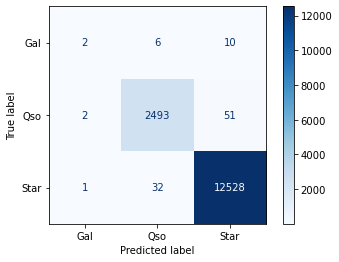

In [18]:
from sklearn.metrics import plot_confusion_matrix

class_names = np.unique(ytestclass)

plot_confusion_matrix(rfc, Xtestclass, ytestclass,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

---

### Photo-z Regression example using Random Forests

Train a simple random forest regressor.   Trying a few different depths as an example of an optimization process.

In this example, we aren't first requiring that the objects be extra-Galactic, but maybe should.

In [19]:
from sklearn.model_selection import train_test_split
Xtrainregress, Xtestregress, ytrainregress, ytestregress = train_test_split(X, yregress)

In [20]:
from sklearn.ensemble import RandomForestRegressor

Find the best depth and determine the photo-z for that depth.

In [21]:
# Ivezic v2, Figure 9.15, edits by GTR
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
def compute_photoz_forest(depth):
    rms_test = np.zeros(len(depth))
    rms_train = np.zeros(len(depth))
    i_best = 0
    yfitbest = None

    for i, d in enumerate(depth):
        print('Depth=',d)
        rfr = RandomForestRegressor(n_estimators=10, max_depth=d, random_state=0, n_jobs=-1)
        rfr.fit(Xtrainregress,ytrainregress)
        
        ytrainpred = rfr.predict(Xtrainregress)
        ytestpred = rfr.predict(Xtestregress)
        
        rms_train[i] = np.mean(np.sqrt((ytrainpred - ytrainregress) ** 2))
        rms_test[i] = np.mean(np.sqrt((ytestpred - ytestregress) ** 2))

        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            yfitbest = ytestpred

    return rms_test, rms_train, i_best, yfitbest


#depth = np.arange(1, 10)
depth = [1,5,9,15]
rms_test, rms_train, i_best, yfitbest = compute_photoz_forest(depth)
best_depth = depth[i_best]

Depth= 1
Depth= 5
Depth= 9
Depth= 15


Plot the results.  (N.B.  No attempt has been made to optimize this.  It is just an example.)

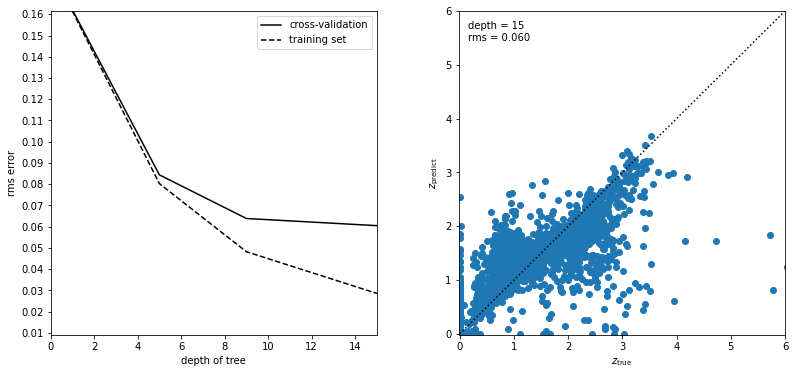

In [22]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# left panel: plot cross-validation results
ax = fig.add_subplot(121)
ax.plot(depth, rms_test, '-k', label='cross-validation')
ax.plot(depth, rms_train, '--k', label='training set')
ax.legend(loc=1)

ax.set_xlabel('depth of tree')
ax.set_ylabel('rms error')

ax.set_xlim(0, depth[-1])
ax.set_ylim(0.009,  rms_train.max())
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

# right panel: plot best fit
ax = fig.add_subplot(122)

#edges = np.linspace(ytestregress.min(), ytestregress.max(), 101)
#H, zs_bins, zp_bins = np.histogram2d(ytestregress, yfitbest, bins=edges)
#ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto', extent=[zs_bins[0], zs_bins[-1], zs_bins[0], zs_bins[-1]], cmap=plt.cm.binary)

ax.scatter(ytestregress, yfitbest)

ax.plot([0, 6], [0, 6], ':k')
ax.text(0.03, 0.97, "depth = %i\nrms = %.3f" % (best_depth, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$z_{\rm true}$')
ax.set_ylabel(r'$z_{\rm predict}$')

ax.set_xlim(-0.02, 6.0)
ax.set_ylim(-0.02, 6.0)

plt.show()